In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import zmplot_utils as zmplot
from CASutils import colorbar_utils as cbars
from CASutils import lensread_utils as lens
import sys

In [2]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/"
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

In [3]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/"
era5 = xr.open_dataset(basepath+'ERA5.nc').psitem
era5['plev'] = era5.plev/100.
era5_seas = era5.groupby('time.season').mean('time')


mems=['001','002','003']
waccm_seas=[]
for imem in mems:
    dat = xr.open_dataset(basepath+'FWHIST_'+imem+'.nc').psitem
    waccm_seas.append(dat.groupby('time.season' ).mean('time'))
    
waccm_seas = xr.concat(waccm_seas, dim=mems)
waccm_seas = waccm_seas.rename({'concat_dim':'M'})


mems=['001','002','003']
l83_seas=[]
for imem in mems:
    dat = xr.open_dataset(basepath+'L83_FHIST_'+imem+'.nc').psitem
    l83_seas.append(dat.groupby('time.season').mean('time'))
    
l83_seas = xr.concat(l83_seas, dim=mems)
l83_seas = l83_seas.rename({'concat_dim':'M'})


/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/project/cas02/islas/miniconda3/envs/islaenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [4]:
mems = lens.lens2memnamegen(30)
lens_seas=[]
for imem in mems:
    dat = xr.open_dataset(basepath+"LENS2/LENS2_"+imem+".nc").psitem
    lens_seas.append(dat.groupby('time.season').mean('time'))
lens_seas = xr.concat(lens_seas, dim=mems)
lens_seas = lens_seas.rename({'concat_dim':'M'})

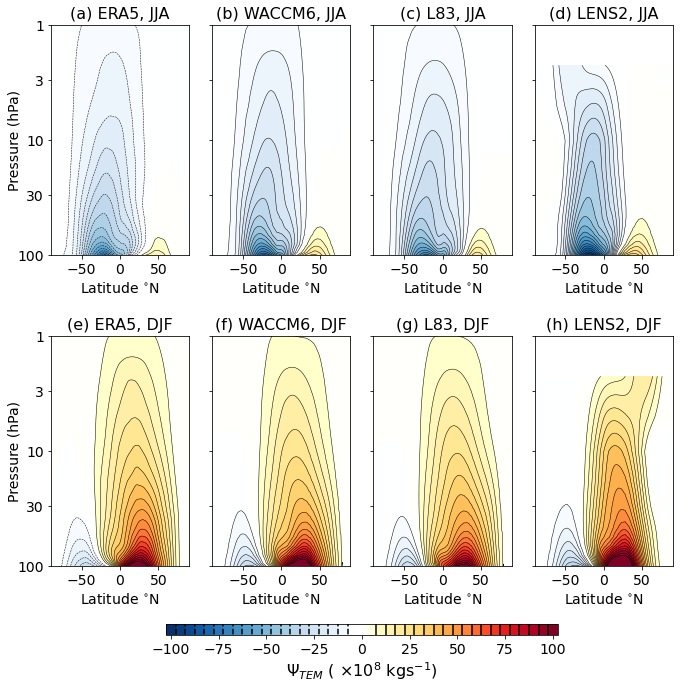

In [5]:
fig = plt.figure(figsize=(16,16))

ax = zmplot.plotlatlogpre_100to1(fig, era5_seas.sel(season='JJA'), era5_seas.lat, era5_seas.plev, 5e8, -1e10,1e10,'(a) ERA5, JJA',
                              0.05,0.17,0.8,1,fsize=14)
ax = zmplot.plotlatlogpre_100to1(fig, waccm_seas.sel(season='JJA').mean('M'), waccm_seas.lat, waccm_seas.ilev, 5e8,-1e10,1e10,'(b) WACCM6, JJA',
                                 0.19,0.31,0.8,1,fsize=14,ylabel=False,yticklabels=False)
ax = zmplot.plotlatlogpre_100to1(fig, l83_seas.sel(season='JJA').mean('M'), l83_seas.lat, l83_seas.ilev,5e8,-1e10,1e10,'(c) L83, JJA',
                                 0.33,0.45,0.8,1,fsize=14,ylabel=False,yticklabels=False)

ax = zmplot.plotlatlogpre_100to1(fig, lens_seas.sel(season='JJA').mean('M'), lens_seas.lat,  lens_seas.ilev,5e8,-1e10,1e10,
                                 '(d) LENS2, JJA',0.47,0.59,0.8,1,fsize=14,ylabel=False,yticklabels=False)



ax = zmplot.plotlatlogpre_100to1(fig, era5_seas.sel(season='DJF'), era5_seas.lat, era5_seas.plev, 5e8, -1e10,1e10,'(e) ERA5, DJF',
                              0.05,0.17,0.53,0.73,fsize=14)
ax = zmplot.plotlatlogpre_100to1(fig, waccm_seas.sel(season='DJF').mean('M'), waccm_seas.lat, waccm_seas.ilev, 5e8,-1e10,1e10,'(f) WACCM6, DJF',
                                 0.19,0.31,0.53,0.73,fsize=14,ylabel=False,yticklabels=False)
ax = zmplot.plotlatlogpre_100to1(fig, l83_seas.sel(season='DJF').mean('M'), l83_seas.lat, l83_seas.ilev,5e8,-1e10,1e10,'(g) L83, DJF',
                                 0.33,0.45,0.53,0.73,fsize=14,ylabel=False,yticklabels=False)

ax = zmplot.plotlatlogpre_100to1(fig, lens_seas.sel(season='DJF').mean('M'), lens_seas.lat, lens_seas.ilev,5e8,-1e10,1e10,
                                 '(h) LENS2, DJF',0.47,0.59,0.53,0.73,fsize=14, ylabel=False,yticklabels=False)


ax = cbars.plotcolorbar(fig, 5,-100,100,'$\Psi_{TEM}$ ( $\\times 10^{8}$ kgs$^{-1}$)',
                        0.15,0.49,0.47,0.48, contourlines=True) 

#ax = cbars.plotcolorbar(fig, 5, -100,100,'$\Psi_{TEM}$ ($\\times 10^{8}$ kgs$^{-1}$)',
#                        0.55,0.95,0.75,0.76)

fig.savefig(plotpath+'fig17.pdf', bbox_inches='tight', facecolor='white')